<a href="https://colab.research.google.com/github/anurag0078/deeplearing_assignments/blob/main/boston_house_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
data_path="/content/gdrive/MyDrive/deep learning/assignment1/housing.data"

In [3]:

from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [4]:
#reading data set
dataframe = read_csv(data_path, delim_whitespace=True, header=None)
dataset = dataframe.values
print(dataset)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


In [5]:
# split (X) and (Y) variables for regression
X = dataset[:,0:13]
Y = dataset[:,13]


In [6]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X ,Y , test_size = 0.10,random_state =2)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer='l1'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu', kernel_regularizer='l1'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

# model = Sequential() 

# model.add(Dense(13,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(5,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model = Sequential() #Create your base model
model.add(Dense(13,activation='relu')) #Add layer with 8 nodes
model.add(Dropout(0.2))# Add 50% Dropout
model.add(Dense(5,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

import tensorflow as tf

with tf.device('/gpu:0'):
  history=model.fit(x=x_train,y=y_train,
            validation_data=(x_test,y_test),
            batch_size=128,epochs=1000, callbacks=[early_stop])

Epoch 1/1000
4/4 [==============================] - 1s 64ms/step - loss: 592.6712 - val_loss: 539.0527
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 586.8239 - val_loss: 532.4767
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 580.0212 - val_loss: 524.6239
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 571.5139 - val_loss: 515.3488
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 560.4242 - val_loss: 504.0657
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 547.7510 - val_loss: 490.4169
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 532.5967 - val_loss: 474.1759
Epoch 8/1000
4/4 [==============================] - 0s 11ms/step - loss: 514.7370 - val_loss: 455.0537
Epoch 9/1000
4/4 [==============================] - 0s 10ms/step - loss: 496.1931 - val_loss: 432.4536
Epoch 10/1000
4/4 [==============================] - 0s 10ms/step - loss:

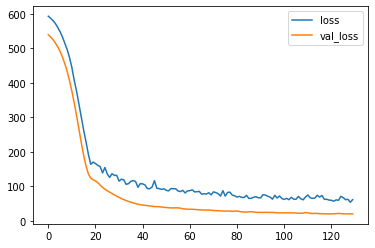

In [10]:
import pandas as pd

losses = pd.DataFrame(model.history.history)
losses.plot()

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(x_test)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))

2.9982887604657344
4.125490655607533
